# SVM Model

In [ ]:
## References:
# PCA plot: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [4]:
#Import libs

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
np.random.seed(42)

In [5]:
#Import data and view data
df = pd.read_csv("homework4_input_data.csv")
df

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.000000,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.000000,0.000000,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.000000,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.000000,0.000000,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.000000,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.000000,0.000000,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.000000,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.236820,0.000000,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.000000,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.000000,0.000000,8.203471,5.718898,0.000000,8.031553,Leukemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,TCGA-PG-A5BC-01,6.752567,2.061867,2.220238,1.670146,2.089802,4.105404,2.631701,3.974129,4.013841,...,3.698293,1.362715,3.888618,5.573470,4.011728,7.686758,7.651728,3.293383,2.737921,Uterine
4332,TCGA-PG-A6IB-01,6.481851,0.195973,3.082744,3.152085,1.974102,2.222543,2.449799,5.039194,2.903390,...,4.814241,1.090338,2.564054,4.638007,3.420460,6.780378,6.572266,0.912975,3.518969,Uterine
4333,TCGA-PG-A7D5-01,7.776659,0.859361,2.016015,1.995366,3.934322,2.520344,3.657478,3.805650,3.698809,...,3.442377,2.463595,5.406420,4.638007,4.104928,6.908519,10.183748,4.845148,2.069559,Uterine
4334,TCGA-PG-A914-01,8.421619,1.287896,0.000000,0.147612,2.094130,2.266953,1.881556,3.754020,3.412572,...,4.304535,0.841096,0.814483,1.931713,2.962235,6.634303,6.314444,1.895622,2.899793,Uterine


## Plot PCA

In [7]:
from sklearn.decomposition import PCA

x = df.drop(['id','Class'], axis =1).values


pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [8]:
principalDf

,pc1,pc2
0,82.045989,46.713038
1,76.722515,37.919090
2,76.643203,39.867672
3,74.817221,36.351123
4,79.694759,43.781057
...,...,...
4331,-0.807805,-18.340476
4332,26.635542,6.047684
4333,-6.453127,-2.468535
4334,1.549730,3.374960


In [9]:
## Concatenate principle 1 and principe 2 with Class
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

In [10]:
finalDf

,pc1,pc2,Class
0,82.045989,46.713038,Leukemia
1,76.722515,37.919090,Leukemia
2,76.643203,39.867672,Leukemia
3,74.817221,36.351123,Leukemia
4,79.694759,43.781057,Leukemia
...,...,...,...
4331,-0.807805,-18.340476,Uterine
4332,26.635542,6.047684,Uterine
4333,-6.453127,-2.468535,Uterine
4334,1.549730,3.374960,Uterine


## Visualize 2D

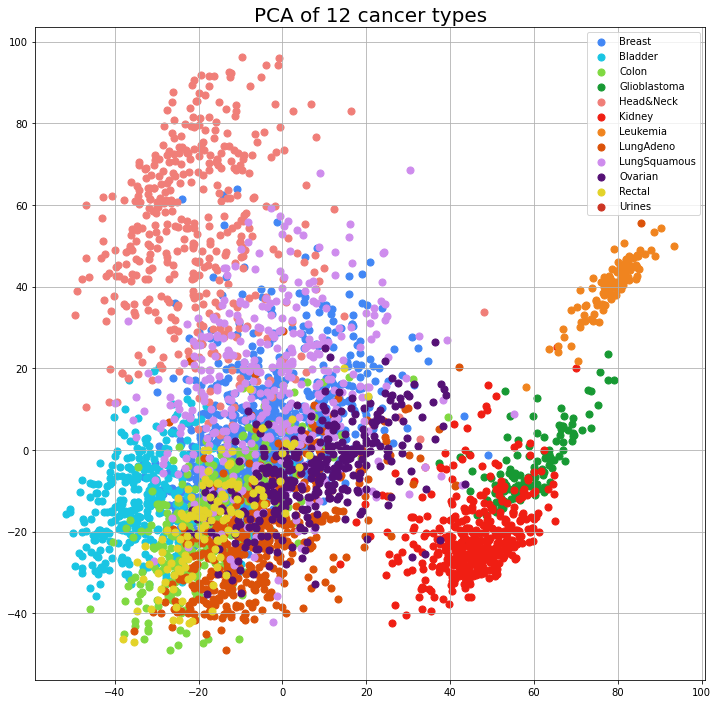

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_title('PCA of 12 cancer types', fontsize = 20)
labels = ['Breast','Bladder','Colon','Glioblastoma','Head&Neck',
           'Kidney','Leukemia','LungAdeno','LungSquamous',
          'Ovarian','Rectal','Urines']
componentColors = ['#4287f5','#19c5e3','#80d941','#179933','#f07e78',
                   '#f01e13','#f0841f','#db5209','#ce8ced','#551075',
                   '#e3d329','#cc3423']
for target, color in zip (labels,componentColors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

## Normalize the data using StandardScaler

In [14]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(x)

## Break the data into the training and test datasets at 80/20 proportion. stratify=Y

In [20]:
Y = finalDf['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

## Build SVM Model

In [22]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train,Y_train)

SVC(C=1, kernel='linear', random_state=42)

## Accuracy of SVM model

In [24]:
print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))
print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.97


In [28]:
### Individual accuracy
accuracies = cross_val_score(model, X_train, Y_train, cv=5)

print("Individual cross-validation accuracies: ", accuracies)
print("Mean cross validation accuracy: ", accuracies.mean())

Individual cross-validation accuracies:  [0.96541787 0.96541787 0.9610951  0.96825397 0.96969697]
Mean cross validation accuracy:  0.9659763547371616


## Plot two confusion matrices for test set predictions

Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0  66   0   0   0   0   0   0   0   8   0]
 [  0   2   0  21   0   0   0   0   0   0   0   0]
 [  0   1   0   0  81   0   0   0   1   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  84   1   0   0   0]
 [  0   0   0   0   0   0   0   2  76   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0  11   0   0   0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.89 0.   0.   0.   0.   0.   0.   0.   0.11 0.  ]
 [0.   0.09 0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.98 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.

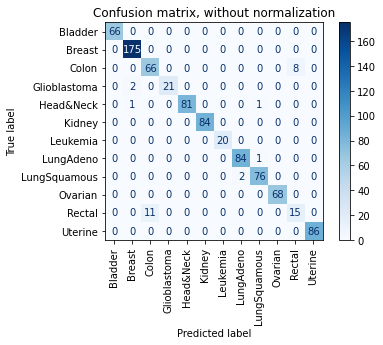

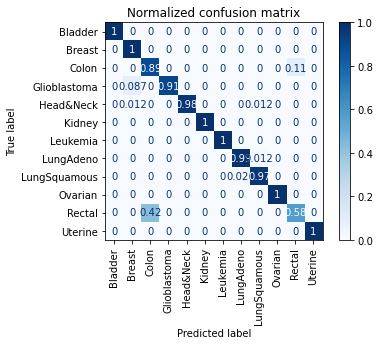

In [34]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels= np.unique(Y),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 xticks_rotation='vertical')
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Perform systematic grid search for the regularization parameter that maximizes model accuracy

In [35]:
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, Y_train)

#means = grid.cv_results_['mean_test_score']
#stds = grid.cv_results_['std_test_score']
#print("Mean accuracies on training : "+str(means))
#print("Accuracy stds: "+str(stds))
  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, Y_test) * 100 ) )

The best parameters are {'C': 0.7430147299885189} with a score of 96
Best estimator accuracy on test set 97.00 


In [37]:
y_true, y_pred = Y_test, grid.predict(X_test)
print("Test acuracy:", accuracy_score(y_true, y_pred))
print("Test precision:", precision_score(y_true, y_pred, average='micro'))
print("Test recall:", recall_score(y_true, y_pred, average='micro'))
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

Test acuracy: 0.9700460829493087
Test precision: 0.9700460829493087
Test recall: 0.9700460829493087

Classification report

              precision    recall  f1-score   support

     Bladder       1.00      1.00      1.00        66
      Breast       0.98      1.00      0.99       175
       Colon       0.86      0.89      0.87        74
Glioblastoma       1.00      0.91      0.95        23
   Head&Neck       1.00      0.98      0.99        83
      Kidney       1.00      1.00      1.00        84
    Leukemia       1.00      1.00      1.00        20
   LungAdeno       0.98      0.99      0.98        85
LungSquamous       0.97      0.97      0.97        78
     Ovarian       1.00      1.00      1.00        68
      Rectal       0.65      0.58      0.61        26
     Uterine       1.00      1.00      1.00        86

    accuracy                           0.97       868
   macro avg       0.95      0.94      0.95       868
weighted avg       0.97      0.97      0.97       868



## Transforming the feature space by PCA prior to building an SVM model

In [38]:
X_reduced = PCA(n_components=5).fit_transform(X_rescaled)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0,stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 5), (3468,), (868, 5), (868,))

In [40]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 0.86
Accuracy of linear SVC on test set: 0.87


Confusion matrix, without normalization
[[ 64   0   0   0   0   0   0   1   0   1   0   0]
 [  0 156   0   0   4   0   0   2  10   1   0   2]
 [  0   0  73   0   0   0   0   0   0   1   0   0]
 [  0   0   0  21   0   0   0   0   1   1   0   0]
 [  0   1   0   0  70   0   0   0  11   0   0   1]
 [  0   0   2   0   0  80   0   1   0   1   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  1   1   0   1   0   0   0  79   3   0   0   0]
 [  0   4   0   0   4   0   0   3  64   3   0   0]
 [  1   3   0   0   0   0   0   1   1  50   0  12]
 [  0   0  25   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0  10   0  76]]
Normalized confusion matrix
[[0.97 0.   0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.  ]
 [0.   0.89 0.   0.   0.02 0.   0.   0.01 0.06 0.01 0.   0.01]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.91 0.   0.   0.   0.   0.04 0.04 0.   0.  ]
 [0.   0.01 0.   0.   0.84 0.   0.   0.   0.13 0.   0.   0.01]
 [0.

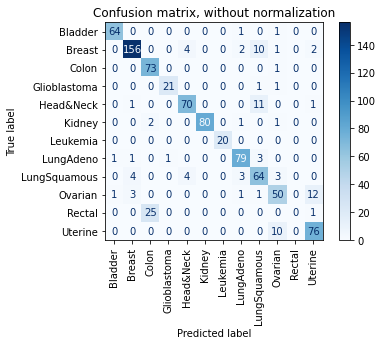

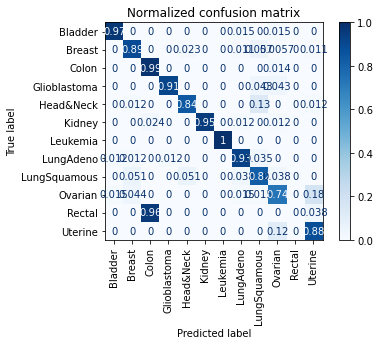

In [41]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels= np.unique(Y),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 xticks_rotation='vertical')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()